# Loading DATA

In [44]:
%%capture
from mp2 import generate_dataset_classification
import sys
import matplotlib
from PIL import Image
import numpy as np
[X_train, X_train_nn, y_train] = generate_dataset_classification(200, 50)

In [45]:

#Reformating the Desired Input
X_train = X_train.reshape(X_train.shape[0],72, 72, 1) 
X_train = X_train.astype('float32') 

#Reformating the Desired Outout (images without noise)
X_train_nn = X_train_nn.reshape(X_train_nn.shape[0],72, 72, 1) 
X_train_nn = np.clip(X_train_nn, 0., 1.)

# Defining the model

In [46]:
from keras.models import Sequential 
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D
model = Sequential() 

model.add(Conv2D(32, (3, 3), activation='relu', padding='same',
                 input_shape=(72, 72, 1)))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))

model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(1, (3, 3), activation='sigmoid', padding='same'))

# Optimization

In [47]:
model.compile(optimizer='adadelta', loss='binary_crossentropy')
DENOISE = model.fit(X_train_nn, X_train, 
                    epochs=100, batch_size=256,
                    shuffle=True, validation_split=0.2)

Train on 160 samples, validate on 40 samples
Epoch 1/100
160/160 [==============================] - 2s 13ms/step - loss: 0.6810 - val_loss: 0.6417
Epoch 2/100
160/160 [==============================] - 2s 11ms/step - loss: 0.6428 - val_loss: 0.5680
Epoch 3/100
160/160 [==============================] - 2s 11ms/step - loss: 0.5709 - val_loss: 0.4892
Epoch 4/100
160/160 [==============================] - 2s 12ms/step - loss: 0.4943 - val_loss: 0.4517
Epoch 5/100
160/160 [==============================] - 2s 11ms/step - loss: 0.4585 - val_loss: 0.4484
Epoch 6/100
160/160 [==============================] - 2s 12ms/step - loss: 0.4551 - val_loss: 0.4452
Epoch 7/100
160/160 [==============================] - 2s 12ms/step - loss: 0.4518 - val_loss: 0.4417
Epoch 8/100
160/160 [==============================] - 2s 11ms/step - loss: 0.4481 - val_loss: 0.4382
Epoch 9/100
160/160 [==============================] - 2s 11ms/step - loss: 0.4445 - val_loss: 0.4347
Epoch 10/100
160/160 [===============

Epoch 81/100
160/160 [==============================] - 2s 11ms/step - loss: 0.3354 - val_loss: 0.3321
Epoch 82/100
160/160 [==============================] - 2s 11ms/step - loss: 0.3346 - val_loss: 0.3313
Epoch 83/100
160/160 [==============================] - 2s 12ms/step - loss: 0.3340 - val_loss: 0.3311
Epoch 84/100
160/160 [==============================] - 2s 12ms/step - loss: 0.3337 - val_loss: 0.3311
Epoch 85/100
160/160 [==============================] - 2s 12ms/step - loss: 0.3338 - val_loss: 0.3317
Epoch 86/100
160/160 [==============================] - 2s 12ms/step - loss: 0.3342 - val_loss: 0.3321
Epoch 87/100
160/160 [==============================] - 2s 12ms/step - loss: 0.3348 - val_loss: 0.3315
Epoch 88/100
160/160 [==============================] - 2s 11ms/step - loss: 0.3341 - val_loss: 0.3309
Epoch 89/100
160/160 [==============================] - 2s 11ms/step - loss: 0.3336 - val_loss: 0.3304
Epoch 90/100
160/160 [==============================] - 2s 11ms/step - lo

* when we increase the number of epochs , the accuracy augments

## visualize graph of loss function

['loss', 'val_loss']


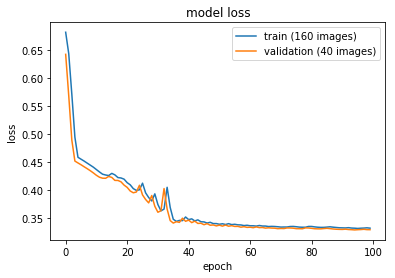

In [56]:
print(DENOISE.history.keys())
# summarize history for loss
plt.plot(DENOISE.history['loss'])
plt.plot(DENOISE.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train (160 images)', 'validation (40 images)'], loc='upper right')
plt.show()

* Nous constatons que notre reseau devient stable à partir de nombre d'epochs = 60.
* On aura plus de précision avec plus de données d'apprentissage. 

# Testing 

In [57]:
%%capture
[X_test, X_test_nn, y_test] = generate_dataset_classification(10, 50)
X_test = X_test.reshape(X_test.shape[0],72, 72, 1) 
X_test = X_test.astype('float32')

In [50]:
decoded_imgs = model.predict(X_test)

In [51]:
im_bruit = X_test.reshape(X_test.shape[0], 72, 72) 
im = decoded_imgs.reshape(decoded_imgs.shape[0], 72, 72)

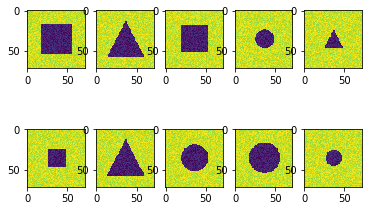

In [58]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(2,5)
axarr[0,0].imshow(im_bruit[0])
axarr[0,1].imshow(im_bruit[1])
axarr[0,2].imshow(im_bruit[2])
axarr[0,3].imshow(im_bruit[3])
axarr[0,4].imshow(im_bruit[4])
axarr[1,0].imshow(im_bruit[5])
axarr[1,1].imshow(im_bruit[6])
axarr[1,2].imshow(im_bruit[7])
axarr[1,3].imshow(im_bruit[8])
axarr[1,4].imshow(im_bruit[9])

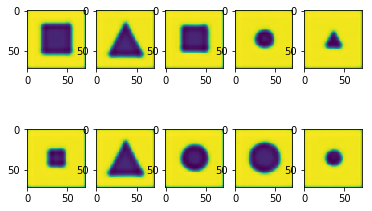

In [53]:
f, axarr = plt.subplots(2,5)
axarr[0,0].imshow(im[0])
axarr[0,1].imshow(im[1])
axarr[0,2].imshow(im[2])
axarr[0,3].imshow(im[3])
axarr[0,4].imshow(im[4])
axarr[1,0].imshow(im[5])
axarr[1,1].imshow(im[6])
axarr[1,2].imshow(im[7])
axarr[1,3].imshow(im[8])
axarr[1,4].imshow(im[9])

* Nous avons supprimé le bruit des images

## Fichier mp2.py 

Voilà le ficher mp1 modifié et adapté pour notre solution de cette exercice (Les parties modifées sont entre deux commentaires)

In [ ]:
import matplotlib.pyplot as plt
# matplotlib inline
import numpy as np
import sys

def generate_a_drawing(figsize, U, V, noise=0.0):
    fig = plt.figure(figsize=(figsize,figsize))
    ax = plt.subplot(111)
    plt.axis('Off')
    ax.set_xlim(0,figsize)
    ax.set_ylim(0,figsize)
    ax.fill(U, V, "k")
    fig.canvas.draw()
    imdata = np.frombuffer(fig.canvas.tostring_rgb(),
                               dtype=np.uint8)[::3].astype(np.float32)
    
    imdata = imdata + noise * np.random.random(imdata.size)
    plt.close(fig)
    return imdata

def generate_a_rectangle(noise=0.0, free_location=False):
    figsize = 1.0    
    U = np.zeros(4)
    V = np.zeros(4)
    if free_location:
        corners = np.random.random(4)
        top = max(corners[0], corners[1])
        bottom = min(corners[0], corners[1])
        left = min(corners[2], corners[3])
        right = max(corners[2], corners[3])
    else:
        side = (0.3 + 0.7 * np.random.random()) * figsize
        top = figsize/2 + side/2
        bottom = figsize/2 - side/2
        left = bottom
        right = top
    U[0] = U[1] = top
    U[2] = U[3] = bottom
    V[0] = V[3] = left
    V[1] = V[2] = right
    
    ########### Modified ##########
    
        imdata = generate_a_drawing(figsize, U, V, noise)
        imdatann = generate_a_drawing(figsize, U, V)	
        return [imdata, imdatann]
    
    ######################################
    
    
	
def generate_a_rectangle1(noise=0.0, free_location=False):
    figsize = 1.0    
    U = np.zeros(4)
    V = np.zeros(4)
    if free_location:
        corners = np.random.random(4)
        top = max(corners[0], corners[1])
        bottom = min(corners[0], corners[1])
        left = min(corners[2], corners[3])
        right = max(corners[2], corners[3])
    else:
        side = (0.3 + 0.7 * np.random.random()) * figsize
        top = figsize/2 + side/2
        bottom = figsize/2 - side/2
        left = bottom
        right = top
    U[0] = U[1] = top
    U[2] = U[3] = bottom
    V[0] = V[3] = left
    V[1] = V[2] = right
    return generate_a_drawing(figsize, U, V, noise)
	

def generate_a_disk(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        center = np.random.random(2)
    else:
        center = (figsize/2, figsize/2)
    radius = (0.3 + 0.7 * np.random.random()) * figsize/2
    N = 50
    U = np.zeros(N)
    V = np.zeros(N)
    i = 0
    for t in np.linspace(0, 2*np.pi, N):
        U[i] = center[0] + np.cos(t) * radius
        V[i] = center[1] + np.sin(t) * radius
        i = i + 1
        
    ############## Modified ##########
    
        imdata = generate_a_drawing(figsize, U, V, noise)
        imdatann = generate_a_drawing(figsize, U, V)	
        return [imdata, imdatann]
    
    ########################################"
    
    
    
def generate_a_triangle(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        U = np.random.random(3)
        V = np.random.random(3)
    else:
        size = (0.3 + 0.7 * np.random.random())*figsize/2
        middle = figsize/2
        U = (middle, middle+size, middle-size)
        V = (middle+size, middle-size, middle-size)
        
        
     ########### Modified ################"
        
        imdata = generate_a_drawing(figsize, U, V, noise)
        imdatann = generate_a_drawing(figsize, U, V)	
        return [imdata, imdatann]
    
     ###################################

    
	
def generate_dataset_classification(nb_samples, noise=0.0, free_location=False):
    # Getting im_size:
    im_size = generate_a_rectangle1().shape[0]
    X = np.zeros([nb_samples,im_size])
    Xnn = np.zeros([nb_samples,im_size])
    Y = np.zeros(nb_samples)
    print('Creating data:')
    for i in range(nb_samples):
        if i % 10 == 0:
            print(i)
        category = np.random.randint(3)
        if category == 0:
            
    ############ Modified ########################  
        
            [X[i], Xnn[i]] = generate_a_rectangle(noise, free_location)
        elif category == 1: 
            [X[i], Xnn[i]] = generate_a_disk(noise, free_location)
        else:
            [X[i], Xnn[i]] = generate_a_triangle(noise, free_location)
        Y[i] = category
        X = (X + noise) / (255 + 2 * noise)
        Xnn = (Xnn) / (255)
        return [X, Xnn, Y]

    ###############################################